<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Замена типа данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Лемматизация</a></span></li><li><span><a href="#Категоризация-данных" data-toc-modified-id="Категоризация-данных-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Категоризация данных</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В нашем исследовании будем использовать данные сервиса Яндекс.Недвижимость. Яндекс.Нежвижимость. — это архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 

**Цель исследования** — научиться определять рыночную стоимость объектов недвижимости, т.е. наиболее вероятную цену, за которую недвижимое имущество может быть продано на рынке недвижимости. 

**Задача исследования** — установить параметры, формирующие стоимость объектов недвижимости. Это позволит построить *автоматизированную систему*: она отследит аномалии и мошенническую деятельность на рынке недвижимости. 

По каждой квартире на продажу доступны два вида данных:
- вписанные пользователем (число балконов, высота потолков и др.)
- полученные автоматически на основе картографических данных (расстояние до ближайшего аэропорта, парка, водоёма и др.)

## Изучение данных из файла

In [703]:
# импорт библиотек и методов
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [704]:
# чтение файла
df = pd.read_csv('/datasets/real_estate_data.csv')

In [705]:
# вывод первых десяти строк таблицы
df.head(10)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


Получив первые несколько строк таблицы, видим, что таблица отображается некорректно. Разделителем столбцов таблицы служит знак табуляции `\t`. Его и запишем в параметр `sep` функции `read_csv()`.

In [706]:
# чтение файла с использованием параметра sep='\t'
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
# вывод первых десяти строк таблицы
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Таблица приняла нужный формат отображения. Однако не все колонки выводятся на экран. Воспользуемся методом pandas `set_option()` для отображения всех столбцов.

In [707]:
# вывод первых десяти строк таблицы с отображением всех столбцов
pd.set_option('display.max_columns', None)
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [708]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [709]:
# получение сводки числовых значений данных в таблице df
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Из полученной информации следует, что таблица содержит 22 столбца с типами данных:

- `bool`
- `float64`
- `int64`
- `object`

**Исходные данные:**

- `airports_nearest` —  расстояние до ближайшего аэропорта в метрах (м) 
- `balcony` — число балконов 
- `ceiling_height` — высота потолков (м) 
- `cityCenters_nearest` — расстояние до центра города (м) 
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж 
- `floors_total` —  всего этажей в доме 
- `is_apartment` — апартаменты (булев тип) 
- `kitchen_area` — площадь кухни в квадратных метрах (м²) 
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²) 
- `locality_name` —  название населённого пункта 
- `open_plan` — свободная планировка (булев тип) 
- `parks_around3000` —  число парков в радиусе 3 км 
- `parks_nearest` — расстояние до ближайшего парка (м) 
- `ponds_around3000` — число водоёмов в радиусе 3 км 
- `ponds_nearest` — расстояние до ближайшего водоёма (м) 
- `rooms` — число комнат 
- `studio` — квартира-студия (булев тип) 
- `total_area` — площадь квартиры в квадратных метрах (м²) 
- `total_images` — число фотографий квартиры в объявлении


В наименованиях колонок использованы 2 стиля названия переменных: *lower_case_with_underscores* и *mixedCase*. Нарушения стилей названия имен отсутствуют.
Количество значений в столбцах различается. Следовательно, в данных есть пропущенные значения.

Минимальное значение в колонке `rooms` равно нулю, а количество комнат не может быть меньше единицы. Возможно пользователи с квартирами-студиями вводили в колонку `rooms` значения 1 или 0: кто-то считал, что квартира-студия представляет из себя одну комнату, другие же считали, что поскольку дополнительных комнат не имеется, то число комнат можно считать равным нулю. Аналогичная ситуация могла возникнуть с однокомнатной квартирой. Эти данные необходимо привести к единому виду.

Максимальное значение высоты потолка `ceiling_height` — 100 метров, похоже на выброс.

**Выводы**

Отдельно взятая строка таблицы  —  данные о квартире, выставленной на продажу на рынке недвижимости. Все квартиры расположены в пределах Санкт-Петербурга или соседних населённых пунктов. Колонки входной таблицы предоставляют информацию о размерах квартиры *(высота потолков, площадь кухни в квадратных метрах, жилая площадь в квадратных метрах, число комнат, площадь квартиры в квадратных метрах)*, типе квартиры *(апартаменты, квартира-студия)* и планировки *(свободная планировка)*, количестве балконов *(число балконов)*, количестве этажей в доме и этаже, на котором расположена квартира *(всего этажей в доме, этаж)*, названии населённого пункта, близлежащей территории *(число парков в радиусе 3 км, число водоёмов в радиусе 3 км)*, расстоянии до определённых объектов/локаций *(расстояние до ближайшего аэропорта в метрах, расстояние до центра города, расстояние до ближайшего парка в метрах, расстояние до ближайшего водоёма)*, а также информацию о публикации объявления о продаже *(сколько дней было размещено объявление, дата публикации, число фотографий квартиры в объявлении)* и цене квартиры *(цена на момент снятия с публикации)*.

Предварительно можно утверждать, что данных достаточно для выявления параметров, формирующих стоимость объектов недвижимости. Однако в данных встречаются пропуски. Возможно наличие дубликатов.

Чтобы проводить исследование, необходимо устранить проблемы в данных.

## Предобработка данных

### Обработка пропусков

In [710]:
# подсчёт доли пропусков
df.isna().mean().reset_index()

,index,0
0,total_images,0.000000
1,last_price,0.000000
2,total_area,0.000000
3,first_day_exposition,0.000000
4,rooms,0.000000
5,ceiling_height,0.387991
6,floors_total,0.003629
7,living_area,0.080299
8,floor,0.000000
9,is_apartment,0.882906


В таблице обнаружены пропуски количественных переменных в `ceiling_height`, `floors_total`, `living_area`, `kitchen_area`, `balcony`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition`, пропуски категориальных переменных в `locality_name` и пропуски логических переменных в `is_apartment`. Пропуски составляют от 0.4% до 66% от общего количества информации. Доля и природа пропусков разные, следовательно, подход к работе с такими пропусками будет отличаться.

Можем предположить, что привело к наличию пропусков в столбцах нашей таблицы. Начнём с данных, вписанных пользователями. Заполняя колонку `ceiling_height`, пользователи, скорее всего, не знали точной высоты потолков своей квартиры, поэтому решили оставить значения пустыми. Аналогичная ситуация могла  возникнуть и с пропусками в колонках `living_area` и `kitchen_area`. Процент пропусков в столбце `locality_name` совсем небольшой, предположительно, пользователи могли по невнимательности пропустить этот столбец, т.к. населённый пункт обычно хорошо известнен всем проживающим в нём людям. Колонку `balcony`, вероятно, оставляли незаполненной те пользователи, у которых нет балкона, отсюда и такой большой процент пропусков. В столбце `is_apartment` процент пропусков ещё выше. Предположительно, этот столбец оставляли пустым пользователи, которые владеют квартирой или квартирой-студией. Пропуски в колонке `days_esposition`, вероятно, возникли из-за того, что сделку по продаже квартиры ещё не осуществили. И, наконец, пропуски в столбце `floors_total`. Возможно пользователи, оставившие этот столбец пустым, живут в одноэтажных постройках.

Информация, полученная автоматически на основе картографических данных, содержит бóльшую долю пропусков. При считывании расстояний до ближайших объектов могла возникнуть ошибка в программе (например, ближайшими парками считались парки в пределах определённого расстояния, с остальными же алгоритм не работал), отсюда и пропуски в данных.

Начнём предобработку данных с пропусков, доля значений которых незначительна. К таким пропускам относятся переменные в двух столбцах таблицы: `floors_total` и `locality_name`. Доля пропусков 0.4% и 0.2% соответственно. Избавимся от пропусков в этих колонках.

In [711]:
# удаление пропусков в столбцах 'floor_total' и 'locality_name'
df = df.dropna(subset=['floors_total', 'locality_name'])

In [712]:
# проверка наличия пропусков
df.isna().mean().reset_index()

,index,0
0,total_images,0.000000
1,last_price,0.000000
2,total_area,0.000000
3,first_day_exposition,0.000000
4,rooms,0.000000
5,ceiling_height,0.385487
6,floors_total,0.000000
7,living_area,0.079143
8,floor,0.000000
9,is_apartment,0.882877


Переходим к столбцам со значительной долей пропусков.
Начинаем с переменных, значения которых вводились пользователями. Пропуски в колонках `ceiling_height`, `living_area`, `kitchen_area ` (доля пропусков в пределах от 8% до 40%) составляют большой процент от общего объёма данных, поэтому по возможности необходимо заполнить их адекватными значениями. На величины в вышеуказанных колонках могут влиять город, в котором находится квартира `locality_name` и количество комнат в квартире `rooms`. Исходя из вышеназванных факторов, группируем данные по городам и заполняем пропуски в зависимости от количества комнат в квартире по медианному значению в столбцах `ceiling_height`, `living_area`, `kitchen_area `.

Перед этим необходимо привести данные в столбце `rooms` к единому виду. Пусть у всех квартир со значением '0' в столбце `rooms` количество комнат будет равно единице.

In [713]:
# заполнение нулевых значений в "rooms"
df.loc[df['rooms'] == 0, 'rooms'] = 1

In [714]:
# вывод уникальных значений для проверки
print(df['rooms'].value_counts())

1     8198
2     7897
3     5779
4     1172
5      325
6      104
7       59
8       12
9        8
10       3
14       2
11       2
15       1
12       1
19       1
16       1
Name: rooms, dtype: int64


Создаём цикл, внутри записываем функцию, которая заполняет пропущенные значения в столбцах `living_area`, `kitchen_area`, `ceiling_height` в зависимости от города и количества комнат.

In [715]:
# заполнение пропущенных значений
column_list = ['living_area', 'kitchen_area', 'ceiling_height']
for column in column_list:
    data_transformed = df.groupby(['locality_name', 'rooms']).agg({column:'median'}).reset_index()
    def fill_data(row):
        if pd.isna(row[column]):
            df_filtered = data_transformed[data_transformed['locality_name'] == row['locality_name']]
            df_filtered = df_filtered[df_filtered['rooms'] == row['rooms']]
            return df_filtered[column].values[0]
        return row[column]
    df[column] = df.apply(fill_data, axis=1)

# вывод первых десяти значений
display(df.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.70,14.0,45.70,9,NaN,False,False,10.00,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.64,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,31.00,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [716]:
# проверка наличия пропусков
df.isna().mean().reset_index()

,index,0
0,total_images,0.000000
1,last_price,0.000000
2,total_area,0.000000
3,first_day_exposition,0.000000
4,rooms,0.000000
5,ceiling_height,0.011076
6,floors_total,0.000000
7,living_area,0.002292
8,floor,0.000000
9,is_apartment,0.882877


Доля пропусков в колонках `living_area`, `kitchen_area`, `ceiling_height` уменьшилась, но не стала равной нулю. Просмотрим пропуски столбца `living_area`, заполнив значения NaN переменной типа *unknown* и закомментируем код, чтобы пропуски остались пропусками. Так будет удобнее работать дальше.

In [717]:
# просмотр пропусков 
#df['living_area'] = df['living_area'].fillna('unknown')
#display(df[df['living_area'] == 'unknown'])

Чтобы понять, что произошло при заполнении пропусков, используем следующую фильтрацию:

In [718]:
# фильтрация df
display(df[(df['locality_name'] == 'посёлок Победа') & (df['rooms'] == 3)])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
595,16,1850000.0,60.9,2019-03-21T00:00:00,3,2.55,5.0,NaN,2,NaN,False,False,6.0,NaN,посёлок Победа,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Получается, что в посёлке 'Победа' есть только одна квартира с тремя комнатами, и у этой квартиры не заполнен столбец `living_area`. Следовательно, медианную площадь рассчитать мы не сможем.

Чтобы избавиться от таких пропусков, попробуем заполнить оставшиеся пропуски медианными значениями в зависимости только от количества комнат в `rooms`.

In [719]:
# заполнение пропущенных значений
column_list = ['living_area', 'kitchen_area', 'ceiling_height']
for column in column_list:
    data_transformed = df.groupby('rooms')[column].transform('median')
    df[column] = df[column].fillna(data_transformed)

In [720]:
# просмотр пропусков
df.isna().sum().reset_index()

,index,0
0,total_images,0
1,last_price,0
2,total_area,0
3,first_day_exposition,0
4,rooms,0
5,ceiling_height,1
6,floors_total,0
7,living_area,0
8,floor,0
9,is_apartment,20805


В столбце `ceiling_height` остался один пропуск. Просмотрим его и попробуем заполнить.

In [721]:
# фильтрация df и заполнение пропусков переменной типа "unknown"
df['ceiling_height'] = df['ceiling_height'].fillna('unknown')
display(df[df['ceiling_height'] == 'unknown'])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14498,6,32250000.0,374.6,2018-06-09T00:00:00,19,unknown,5.0,264.5,2,NaN,False,False,27.6,NaN,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0


Получилось следующее: в таблице существует только одна строка со значением `rooms` равным девятнадцати, поэтому медианная высота потолка не могла быть подсчитана. Попробуем заполнить высоту потолка `ceiling_height`, ипользуя значение ближайшей по количеству комнат квартиры.

In [722]:
# вывод уникальных значеий
print(df['rooms'].value_counts())

1     8198
2     7897
3     5779
4     1172
5      325
6      104
7       59
8       12
9        8
10       3
14       2
11       2
15       1
12       1
19       1
16       1
Name: rooms, dtype: int64


Ближайшее количество комнат к девятнадцати - шестнадцать. Выведем эту строку, чтобы посмотреть значение высоты потолка в квартире.

In [723]:
# вывод строки таблицы
display(df.query('rooms == 16'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
18848,6,28500000.0,270.0,2015-03-02T00:00:00,16,3,4.0,180.0,4,NaN,False,False,13.0,1.0,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0


Высота потолка - 3 метра, возможно значение велико, однако, квартира с 19-ю комнатами всего одна, поэтому заполнение таким значением не приведёт к значительному искажению данных.

In [724]:
# заполнение пропущенного значения
df.loc[df['ceiling_height'] == 'unknown', 'ceiling_height'] = 3

In [725]:
# просмотр пропусков
df.isna().sum().reset_index()

,index,0
0,total_images,0
1,last_price,0
2,total_area,0
3,first_day_exposition,0
4,rooms,0
5,ceiling_height,0
6,floors_total,0
7,living_area,0
8,floor,0
9,is_apartment,20805


Снизим долю пропусков в колонке `is_apartment`, используя колонку `studio`. Если квартира является квартирой-студией, то она не может быть в категории "апартаменты".

In [726]:
# сокращение доли пропусков
df.loc[df['studio'] == True, 'is_apartment'] = False

In [727]:
# просмотр пропусков
df.isna().sum().reset_index()

,index,0
0,total_images,0
1,last_price,0
2,total_area,0
3,first_day_exposition,0
4,rooms,0
5,ceiling_height,0
6,floors_total,0
7,living_area,0
8,floor,0
9,is_apartment,20674


Количество пропусков в столбце `is_apartment` уменьшилось ненамного. Но заполнять пропуски в этом столбце дальше мы не можем, т.к. данных недостаточно. Недвижимость может быть как квартирой, так и апартаментами.

Приступим к колонке `balcony`. Вероятно, пользователи, не имеющие балконов в квартире, оставили колонку незаполненной. Заполним все пропуски в данном столбце нулями.

In [728]:
# заполнение пропущенных значений
df['balcony'] = df['balcony'].fillna(0)

In [729]:
# просмотр доли пропусков
df.isna().mean().reset_index()

,index,0
0,total_images,0.000000
1,last_price,0.000000
2,total_area,0.000000
3,first_day_exposition,0.000000
4,rooms,0.000000
5,ceiling_height,0.000000
6,floors_total,0.000000
7,living_area,0.000000
8,floor,0.000000
9,is_apartment,0.877318


Пропуски в данных, полученных автоматически на основе картографических данных, заполнять не будем. Разобраться в причине ошибки программы, которую мы не видели, сложно. А принцип заполнения пропусков будет зависеть от работы программы. Чтобы избежать бóльшего искажения данных, оставим значения нетронутыми.

Вернёмся к сводке числовых значений данных *df* раздела 1, вспомним, что у нас есть , по крайней мере, одно аномальное максимальное значение высоты потолка в `ceiling_height`. 

Построим гистограмму, чтобы отсмотреть аномальные значения.

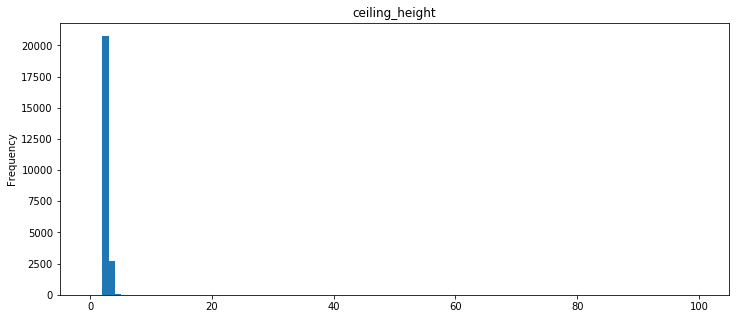

In [730]:
# построение гистограммы
df['ceiling_height'].plot(kind='hist', bins=100, range=(0, 100), figsize=(12, 5), title='ceiling_height')

Значение высоты потолка колеблется в пределах пяти метров, других начений - единицы, поэтому они сливаются с осью. Отбросим все значения больше пяти метров.

In [731]:
# удаление выброса
df = df[df['ceiling_height'] < 5]
# присваивание новых индексов
df = df.reset_index()

**Вывод**

Пропуски значений заполнены. Продолжаем предобработку данных.

### Замена типа данных

Для более удобной работы с данными приведём все числовые значения к целочисленным. Проверим типы данных атрибутом датафрейма `.info()`.

In [732]:
# проверка типов данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 23 columns):
index                   23524 non-null int64
total_images            23524 non-null int64
last_price              23524 non-null float64
total_area              23524 non-null float64
first_day_exposition    23524 non-null object
rooms                   23524 non-null int64
ceiling_height          23524 non-null object
floors_total            23524 non-null float64
living_area             23524 non-null float64
floor                   23524 non-null int64
is_apartment            2876 non-null object
studio                  23524 non-null bool
open_plan               23524 non-null bool
kitchen_area            23524 non-null float64
balcony                 23524 non-null float64
locality_name           23524 non-null object
airports_nearest        18015 non-null float64
cityCenters_nearest     18038 non-null float64
parks_around3000        18039 non-null float64
parks_nearest    

Данные в столбцах `last_price`, `total_area`, `floors_total`, `living_area`, `kitchen_area`, `balcony`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition` представлены типом `float`. Приведём их к типу `int`.

In [733]:
# приведение данных без пропусков к типу "int" 
columns = ['last_price', 'total_area', 'floors_total', 'ceiling_height',
           'living_area', 'kitchen_area', 'balcony']
for column in columns:
    df[column] = df[column].astype('int')

In [734]:
# проверка типов данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 23 columns):
index                   23524 non-null int64
total_images            23524 non-null int64
last_price              23524 non-null int64
total_area              23524 non-null int64
first_day_exposition    23524 non-null object
rooms                   23524 non-null int64
ceiling_height          23524 non-null int64
floors_total            23524 non-null int64
living_area             23524 non-null int64
floor                   23524 non-null int64
is_apartment            2876 non-null object
studio                  23524 non-null bool
open_plan               23524 non-null bool
kitchen_area            23524 non-null int64
balcony                 23524 non-null int64
locality_name           23524 non-null object
airports_nearest        18015 non-null float64
cityCenters_nearest     18038 non-null float64
parks_around3000        18039 non-null float64
parks_nearest           8015 n

In [735]:
# приведение данных с пропусками к типу "int" 
import numpy as np
columns = ['airports_nearest', 'cityCenters_nearest', 'parks_around3000',
           'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']
for column in columns:
    df[column] = df[column].astype('float32').astype('Int64')

In [736]:
# проверка типов данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 23 columns):
index                   23524 non-null int64
total_images            23524 non-null int64
last_price              23524 non-null int64
total_area              23524 non-null int64
first_day_exposition    23524 non-null object
rooms                   23524 non-null int64
ceiling_height          23524 non-null int64
floors_total            23524 non-null int64
living_area             23524 non-null int64
floor                   23524 non-null int64
is_apartment            2876 non-null object
studio                  23524 non-null bool
open_plan               23524 non-null bool
kitchen_area            23524 non-null int64
balcony                 23524 non-null int64
locality_name           23524 non-null object
airports_nearest        18015 non-null Int64
cityCenters_nearest     18038 non-null Int64
parks_around3000        18039 non-null Int64
parks_nearest           8015 non-nul

In [737]:
# просмотр первых десяти строк таблицы
df.head(10)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,0,20,13000000,108,2019-03-07T00:00:00,3,2,16,51,8,NaN,False,False,25,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN
1,1,7,3350000,40,2018-12-04T00:00:00,1,2,11,18,1,NaN,False,False,11,2,посёлок Шушары,12817,18603,0,NaN,0,NaN,81
2,2,10,5196000,56,2015-08-20T00:00:00,2,2,5,34,4,NaN,False,False,8,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,3,0,64900000,159,2015-07-24T00:00:00,3,2,14,45,9,NaN,False,False,10,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,4,2,10000000,100,2018-06-19T00:00:00,2,3,14,32,13,NaN,False,False,41,0,Санкт-Петербург,31856,8098,2,112,1,48,121
5,5,10,2890000,30,2018-09-10T00:00:00,1,2,12,14,5,NaN,False,False,9,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55
6,6,6,3700000,37,2017-11-02T00:00:00,1,2,26,10,6,NaN,False,False,14,1,посёлок Парголово,52996,19143,0,NaN,0,NaN,155
7,7,5,7915000,71,2019-04-18T00:00:00,2,2,24,31,22,NaN,False,False,18,2,Санкт-Петербург,23982,11634,0,NaN,0,NaN,NaN
8,8,20,2900000,33,2018-05-23T00:00:00,1,2,27,15,26,NaN,False,False,8,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189
9,9,18,5400000,61,2017-02-26T00:00:00,3,2,9,43,7,NaN,False,False,6,2,Санкт-Петербург,50898,15008,0,NaN,0,NaN,289


**Вывод**

Типы данных в количественных переменных приведены к типу `int`. Приступаем к обработке дубликатов.

### Обработка дубликатов

Явные дубликаты в таблице могли появиться вследствии сбоя программы при сборе или соединении данных. На наличие неявных дубликатов, предположительно, повлиял свободный формат ввода данных в ячейку, при котором пользователи имели возможность ошибиться.

Перед тем как приступать к подсчёту дубликатов, приведем все данные в таблице к *нижнему регистру*, чтобы не упускать дубликаты:

In [738]:
# приведение данных к нижнему регистру
df['locality_name'] = df['locality_name'].str.lower()

Теперь можно вести подсчёт дубликатов:

In [739]:
# подсчёт дуликатов
print('Количество явных дубликатов: {}'.format(df.duplicated().sum()))

Количество явных дубликатов: 0


**Вывод**

Обработка данных на наличие дубликатов завершена. Дубликаты отсутствуют.

### Лемматизация

Выделим леммы в значениях столбца `locality_name`.

Для этого сначала импортируем библиотеку с функцией лемматизации на русском языке `pymystem3` и специальный контейнер `Counter` для подсчёта упоминаний лемматизированных слов:

In [740]:
# импорт библиотеки и специального контейнера
from pymystem3 import Mystem
from collections import Counter
m = Mystem()

Проводим лемматизацию в столбце `locality_name`:

In [741]:
# создание пустого списка для хранения лемм
lemmas_locality_name = []
# цикл для нахождения лемм в столбцe 'locality_name'
for index in range(len(df)):
    lemmas = m.lemmatize(df.loc[index,'locality_name'])
    lemmas_locality_name += lemmas

Выводим число упоминаний лемматизированных слов:

In [742]:
print(Counter(lemmas_locality_name))

Counter({'\n': 23524, 'санкт-петербург': 15627, ' ': 5190, 'поселок': 2645, 'деревня': 940, 'муриный': 584, 'городской': 547, 'кудрово': 470, 'шушары': 439, 'всеволожск': 398, 'пушкин': 369, 'тип': 362, 'колпино': 338, 'парголовый': 327, 'гатчина': 306, 'выборг': 237, 'село': 207, 'петергоф': 201, 'красный': 187, 'новый': 184, 'сестрорецк': 183, 'девяткино': 143, 'сертолово': 142, 'ломоносов': 133, 'кириши': 125, 'бугор': 113, 'сланцы': 112, 'волхов': 110, 'сосновый': 105, 'кингисепп': 104, 'тосно': 104, 'бор': 101, 'кронштадт': 95, 'никольское': 94, '-': 91, 'коммунар': 90, 'кировск': 84, 'отрадный': 80, 'старый': 75, 'янино': 68, '1': 68, 'металлострой': 66, 'приозерск': 66, 'луг': 60, 'шлиссельбург': 57, 'имя': 53, 'тихвин': 49, 'стрельна': 43, 'тельман': 41, 'рощино': 39, 'большой': 39, 'павловск': 38, 'романовка': 37, 'волосово': 36, 'свердлов': 36, 'кузьмоловский': 35, 'мга': 33, 'сиверский': 29, 'ивангород': 28, 'малый': 28, 'новоселье': 27, 'сясьстрой': 24, 'зеленогорск': 24, '

**Вывод**

Проведена лемматизация столбца `locality_name`. Подсчитано количество упоминаний лемм. 

### Категоризация данных

В разделе *лемматизации* мы находили леммы слов. Выведем уникальные значения столбца `locality_name`, чтобы подобрать леммы, которые помогут категоризировать данные:

In [743]:
# вывод уникальных значений столбца "locality_name"
print(df['locality_name'].unique())

['санкт-петербург' 'посёлок шушары' 'городской посёлок янино-1'
 'посёлок парголово' 'посёлок мурино' 'ломоносов' 'сертолово' 'петергоф'
 'пушкин' 'деревня кудрово' 'коммунар' 'колпино'
 'поселок городского типа красный бор' 'гатчина' 'поселок мурино'
 'деревня фёдоровское' 'выборг' 'кронштадт' 'кировск'
 'деревня новое девяткино' 'посёлок металлострой'
 'посёлок городского типа лебяжье' 'посёлок городского типа сиверский'
 'поселок молодцово' 'поселок городского типа кузьмоловский'
 'садовое товарищество новая ропша' 'павловск' 'деревня пикколово'
 'всеволожск' 'волхов' 'кингисепп' 'приозерск' 'сестрорецк'
 'деревня куттузи' 'посёлок аннино' 'поселок городского типа ефимовский'
 'посёлок плодовое' 'деревня заклинье' 'поселок торковичи'
 'поселок первомайское' 'красное село' 'посёлок понтонный' 'сясьстрой'
 'деревня старая' 'деревня лесколово' 'посёлок новый свет' 'сланцы'
 'село путилово' 'ивангород' 'мурино' 'шлиссельбург' 'никольское'
 'зеленогорск' 'сосновый бор' 'поселок новый све

Напишем функцию, которая категоризирует данные столбца `locality_name` c использованием лемм:

In [744]:
# функция присваивания категории значениям в столбце "locality_name"
def locality_group(locality_name):
    """
    Возвращает категорию населённого пункта по значению названия населённого пункта locality_name, используя правила:
    - 'посёлок' при значении леммы 'посёлок' в locality_name,
    - 'посёлок городского типа' при значении леммы 'посёлок' и 'городской' в locality_name,
    - 'деревня' при значении леммы 'деревня' в locality_name,
    - 'Санкт-Петербург' при значении леммы 'санкт-петербург' в locality_name,
    - 'другой город' при остальных значениях леммы
    """
    lemmas = m.lemmatize(locality_name)
    if 'поселок' in lemmas:
        if 'городской' in lemmas:
            return 'посёлок городского типа'
        else:
            return 'посёлок'         
    elif 'деревня' in lemmas:
        return 'деревня'
    elif 'санкт-петербург' in lemmas:
        return 'Санкт-Петербург'
    else:
        return 'другой город'

Проверим работу функции:

In [745]:
# вывод значений
print(locality_group('красивый поселок'))
print(locality_group('поселок городского типа'))
print(locality_group('деревня девяткино'))
print(locality_group('санкт-петербург'))
print(locality_group('петергоф'))

посёлок
посёлок городского типа
деревня
Санкт-Петербург
другой город



Функция работает корректно.

Создаём столбец `locality_group` c присвоенными категориями населённых пунктов, используя метод *apply()* и функцию *locality_group*. Столбец добавляем не в конец таблицы, а следующим за столбцом `locality_name` для большей наглядности. Применяем метод *insert()*.

In [746]:
# добавление колонки "locality_group" в таблицу
df.insert(15,'locality_group',df['locality_name'].apply(locality_group))
# вывод первых 10 строк таблицы
df.head(10)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_group,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,0,20,13000000,108,2019-03-07T00:00:00,3,2,16,51,8,NaN,False,False,25,0,Санкт-Петербург,санкт-петербург,18863,16028,1,482,2,755,NaN
1,1,7,3350000,40,2018-12-04T00:00:00,1,2,11,18,1,NaN,False,False,11,2,посёлок,посёлок шушары,12817,18603,0,NaN,0,NaN,81
2,2,10,5196000,56,2015-08-20T00:00:00,2,2,5,34,4,NaN,False,False,8,0,Санкт-Петербург,санкт-петербург,21741,13933,1,90,2,574,558
3,3,0,64900000,159,2015-07-24T00:00:00,3,2,14,45,9,NaN,False,False,10,0,Санкт-Петербург,санкт-петербург,28098,6800,2,84,3,234,424
4,4,2,10000000,100,2018-06-19T00:00:00,2,3,14,32,13,NaN,False,False,41,0,Санкт-Петербург,санкт-петербург,31856,8098,2,112,1,48,121
5,5,10,2890000,30,2018-09-10T00:00:00,1,2,12,14,5,NaN,False,False,9,0,посёлок городского типа,городской посёлок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55
6,6,6,3700000,37,2017-11-02T00:00:00,1,2,26,10,6,NaN,False,False,14,1,посёлок,посёлок парголово,52996,19143,0,NaN,0,NaN,155
7,7,5,7915000,71,2019-04-18T00:00:00,2,2,24,31,22,NaN,False,False,18,2,Санкт-Петербург,санкт-петербург,23982,11634,0,NaN,0,NaN,NaN
8,8,20,2900000,33,2018-05-23T00:00:00,1,2,27,15,26,NaN,False,False,8,0,посёлок,посёлок мурино,NaN,NaN,NaN,NaN,NaN,NaN,189
9,9,18,5400000,61,2017-02-26T00:00:00,3,2,9,43,7,NaN,False,False,6,2,Санкт-Петербург,санкт-петербург,50898,15008,0,NaN,0,NaN,289


Теперь присвоим *id* каждой категории населённого пункта и запишем их в новый столбец `locality_group_id`. Используем метод *map()*.

In [747]:
# присваивание id категориям
d = {j:i for i,j in enumerate(df['locality_group'].unique())}
df.insert(16, 'locality_group_id', df['locality_group'].map(d))
# вывод первых 10 строк таблицы
df.head(10)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_group,locality_group_id,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,0,20,13000000,108,2019-03-07T00:00:00,3,2,16,51,8,NaN,False,False,25,0,Санкт-Петербург,0,санкт-петербург,18863,16028,1,482,2,755,NaN
1,1,7,3350000,40,2018-12-04T00:00:00,1,2,11,18,1,NaN,False,False,11,2,посёлок,1,посёлок шушары,12817,18603,0,NaN,0,NaN,81
2,2,10,5196000,56,2015-08-20T00:00:00,2,2,5,34,4,NaN,False,False,8,0,Санкт-Петербург,0,санкт-петербург,21741,13933,1,90,2,574,558
3,3,0,64900000,159,2015-07-24T00:00:00,3,2,14,45,9,NaN,False,False,10,0,Санкт-Петербург,0,санкт-петербург,28098,6800,2,84,3,234,424
4,4,2,10000000,100,2018-06-19T00:00:00,2,3,14,32,13,NaN,False,False,41,0,Санкт-Петербург,0,санкт-петербург,31856,8098,2,112,1,48,121
5,5,10,2890000,30,2018-09-10T00:00:00,1,2,12,14,5,NaN,False,False,9,0,посёлок городского типа,2,городской посёлок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55
6,6,6,3700000,37,2017-11-02T00:00:00,1,2,26,10,6,NaN,False,False,14,1,посёлок,1,посёлок парголово,52996,19143,0,NaN,0,NaN,155
7,7,5,7915000,71,2019-04-18T00:00:00,2,2,24,31,22,NaN,False,False,18,2,Санкт-Петербург,0,санкт-петербург,23982,11634,0,NaN,0,NaN,NaN
8,8,20,2900000,33,2018-05-23T00:00:00,1,2,27,15,26,NaN,False,False,8,0,посёлок,1,посёлок мурино,NaN,NaN,NaN,NaN,NaN,NaN,189
9,9,18,5400000,61,2017-02-26T00:00:00,3,2,9,43,7,NaN,False,False,6,2,Санкт-Петербург,0,санкт-петербург,50898,15008,0,NaN,0,NaN,289


Создаём словарь-таблицу, который содержит информацию о типе населённого пункта, в котором находится квартира:

In [748]:
# формирование словаря-таблицы типов населённых пунктов
df_dict_locality_type = df[['locality_group_id', 'locality_group']]
# вывод первых 10 строк таблицы
df_dict_locality_type.head(10)

,locality_group_id,locality_group
0,0,Санкт-Петербург
1,1,посёлок
2,0,Санкт-Петербург
3,0,Санкт-Петербург
4,0,Санкт-Петербург
5,2,посёлок городского типа
6,1,посёлок
7,0,Санкт-Петербург
8,1,посёлок
9,0,Санкт-Петербург


In [749]:
# удаление дубликтов и вывод таблицы
df_dict_locality_type = df_dict_locality_type.drop_duplicates().reset_index(drop=True)
display(df_dict_locality_type)

,locality_group_id,locality_group
0,0,Санкт-Петербург
1,1,посёлок
2,2,посёлок городского типа
3,3,другой город
4,4,деревня


Обновим исходную таблицу *df* и запишем результат в новую переменную. Удалим столбцы `locality_name`, `locality_group` и добавим столбец `locality_group_id`.

In [750]:
# обновление таблицы и вывод первых 10 значений
df_log = df[['total_images', 'last_price', 'total_area', 'first_day_exposition', 
             'rooms', 'ceiling_height', 'floors_total', 'living_area',
             'floor', 'is_apartment', 'studio', 'open_plan', 
             'kitchen_area', 'balcony', 'locality_group_id', 'airports_nearest', 
             'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 
             'ponds_nearest', 'days_exposition']]
df_log.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_group_id,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07T00:00:00,3,2,16,51,8,NaN,False,False,25,0,0,18863,16028,1,482,2,755,NaN
1,7,3350000,40,2018-12-04T00:00:00,1,2,11,18,1,NaN,False,False,11,2,1,12817,18603,0,NaN,0,NaN,81
2,10,5196000,56,2015-08-20T00:00:00,2,2,5,34,4,NaN,False,False,8,0,0,21741,13933,1,90,2,574,558
3,0,64900000,159,2015-07-24T00:00:00,3,2,14,45,9,NaN,False,False,10,0,0,28098,6800,2,84,3,234,424
4,2,10000000,100,2018-06-19T00:00:00,2,3,14,32,13,NaN,False,False,41,0,0,31856,8098,2,112,1,48,121
5,10,2890000,30,2018-09-10T00:00:00,1,2,12,14,5,NaN,False,False,9,0,2,NaN,NaN,NaN,NaN,NaN,NaN,55
6,6,3700000,37,2017-11-02T00:00:00,1,2,26,10,6,NaN,False,False,14,1,1,52996,19143,0,NaN,0,NaN,155
7,5,7915000,71,2019-04-18T00:00:00,2,2,24,31,22,NaN,False,False,18,2,0,23982,11634,0,NaN,0,NaN,NaN
8,20,2900000,33,2018-05-23T00:00:00,1,2,27,15,26,NaN,False,False,8,0,1,NaN,NaN,NaN,NaN,NaN,NaN,189
9,18,5400000,61,2017-02-26T00:00:00,3,2,9,43,7,NaN,False,False,6,2,0,50898,15008,0,NaN,0,NaN,289


**Вывод**

В процессе категоризации исходная таблица *df* была поделена на части:
- первая часть — *df_log*, из которой исключены столбцы `locality_name`, `locality_group` таблицы *df*, вместо них оставлен столбец `locality_group_id`
- вторая часть — таблица-словарь к *df_log*: `df_dict_locality_type`

## Расчёты и добавление результатов в таблицу

Рассчитаем и добавим в таблицу следующие параметры: 
* цену квадратного метра
* день недели, месяц и год публикации объявления
* этаж квартиры; варианты - первый, последний, другой
* соотношение жилой и общей площади, а также отношение площади кухни к общей

In [751]:
# расчёт цены квадратного метра и добавление результата в таблицу
df['square_meter_price'] = (df['last_price'] / df['total_area']).astype('int')
# вывод первых десяти значений таблицы
df.head(10)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_group,locality_group_id,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price
0,0,20,13000000,108,2019-03-07T00:00:00,3,2,16,51,8,NaN,False,False,25,0,Санкт-Петербург,0,санкт-петербург,18863,16028,1,482,2,755,NaN,120370
1,1,7,3350000,40,2018-12-04T00:00:00,1,2,11,18,1,NaN,False,False,11,2,посёлок,1,посёлок шушары,12817,18603,0,NaN,0,NaN,81,83750
2,2,10,5196000,56,2015-08-20T00:00:00,2,2,5,34,4,NaN,False,False,8,0,Санкт-Петербург,0,санкт-петербург,21741,13933,1,90,2,574,558,92785
3,3,0,64900000,159,2015-07-24T00:00:00,3,2,14,45,9,NaN,False,False,10,0,Санкт-Петербург,0,санкт-петербург,28098,6800,2,84,3,234,424,408176
4,4,2,10000000,100,2018-06-19T00:00:00,2,3,14,32,13,NaN,False,False,41,0,Санкт-Петербург,0,санкт-петербург,31856,8098,2,112,1,48,121,100000
5,5,10,2890000,30,2018-09-10T00:00:00,1,2,12,14,5,NaN,False,False,9,0,посёлок городского типа,2,городской посёлок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,96333
6,6,6,3700000,37,2017-11-02T00:00:00,1,2,26,10,6,NaN,False,False,14,1,посёлок,1,посёлок парголово,52996,19143,0,NaN,0,NaN,155,100000
7,7,5,7915000,71,2019-04-18T00:00:00,2,2,24,31,22,NaN,False,False,18,2,Санкт-Петербург,0,санкт-петербург,23982,11634,0,NaN,0,NaN,NaN,111478
8,8,20,2900000,33,2018-05-23T00:00:00,1,2,27,15,26,NaN,False,False,8,0,посёлок,1,посёлок мурино,NaN,NaN,NaN,NaN,NaN,NaN,189,87878
9,9,18,5400000,61,2017-02-26T00:00:00,3,2,9,43,7,NaN,False,False,6,2,Санкт-Петербург,0,санкт-петербург,50898,15008,0,NaN,0,NaN,289,88524


In [752]:
# приведение даты к формату "datetime"
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# добавление дня недели, месяца и года публикации объявления
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
df.head(10)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_group,locality_group_id,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year
0,0,20,13000000,108,2019-03-07,3,2,16,51,8,NaN,False,False,25,0,Санкт-Петербург,0,санкт-петербург,18863,16028,1,482,2,755,NaN,120370,3,3,2019
1,1,7,3350000,40,2018-12-04,1,2,11,18,1,NaN,False,False,11,2,посёлок,1,посёлок шушары,12817,18603,0,NaN,0,NaN,81,83750,1,12,2018
2,2,10,5196000,56,2015-08-20,2,2,5,34,4,NaN,False,False,8,0,Санкт-Петербург,0,санкт-петербург,21741,13933,1,90,2,574,558,92785,3,8,2015
3,3,0,64900000,159,2015-07-24,3,2,14,45,9,NaN,False,False,10,0,Санкт-Петербург,0,санкт-петербург,28098,6800,2,84,3,234,424,408176,4,7,2015
4,4,2,10000000,100,2018-06-19,2,3,14,32,13,NaN,False,False,41,0,Санкт-Петербург,0,санкт-петербург,31856,8098,2,112,1,48,121,100000,1,6,2018
5,5,10,2890000,30,2018-09-10,1,2,12,14,5,NaN,False,False,9,0,посёлок городского типа,2,городской посёлок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,96333,0,9,2018
6,6,6,3700000,37,2017-11-02,1,2,26,10,6,NaN,False,False,14,1,посёлок,1,посёлок парголово,52996,19143,0,NaN,0,NaN,155,100000,3,11,2017
7,7,5,7915000,71,2019-04-18,2,2,24,31,22,NaN,False,False,18,2,Санкт-Петербург,0,санкт-петербург,23982,11634,0,NaN,0,NaN,NaN,111478,3,4,2019
8,8,20,2900000,33,2018-05-23,1,2,27,15,26,NaN,False,False,8,0,посёлок,1,посёлок мурино,NaN,NaN,NaN,NaN,NaN,NaN,189,87878,2,5,2018
9,9,18,5400000,61,2017-02-26,3,2,9,43,7,NaN,False,False,6,2,Санкт-Петербург,0,санкт-петербург,50898,15008,0,NaN,0,NaN,289,88524,6,2,2017


Месяцы и дни недели пронумерованы по порядку, начиная с нуля.

**Дни недели:**
- понедельник *0*
- вторник *1*
- среда *2*
- четверг *3*
- пятница *4*
- суббота *5*
- воскресенье *6*

**Месяцы:**
- январь *0*
- февраль *1*
- март *2*
- апрель *3*
- май *4*
- июнь *5*
- июль *6*
- август *7*
- сентябрь *8*
- октябрь *9*
- ноябрь *10*
- декабрь *11*


In [753]:
# категоризация этажей квартиры с помощью функции
def floor_type(row):
    """
    Возвращает категорию этажа квартиры по значению столбца floor, используя правила:
    - 'первый' при значении 1 во floor,
    - 'другой' при значении во floor меньшем, чем во floors_total,
    - 'последний' в остальных случаях
    """
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] < row['floors_total']:
        return 'другой'
    else:
        return 'последний'

# применение функции
df['floor_category'] = df.apply(floor_type, axis=1)
# вывод первых десяти значений
df.head(10)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_group,locality_group_id,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,floor_category
0,0,20,13000000,108,2019-03-07,3,2,16,51,8,NaN,False,False,25,0,Санкт-Петербург,0,санкт-петербург,18863,16028,1,482,2,755,NaN,120370,3,3,2019,другой
1,1,7,3350000,40,2018-12-04,1,2,11,18,1,NaN,False,False,11,2,посёлок,1,посёлок шушары,12817,18603,0,NaN,0,NaN,81,83750,1,12,2018,первый
2,2,10,5196000,56,2015-08-20,2,2,5,34,4,NaN,False,False,8,0,Санкт-Петербург,0,санкт-петербург,21741,13933,1,90,2,574,558,92785,3,8,2015,другой
3,3,0,64900000,159,2015-07-24,3,2,14,45,9,NaN,False,False,10,0,Санкт-Петербург,0,санкт-петербург,28098,6800,2,84,3,234,424,408176,4,7,2015,другой
4,4,2,10000000,100,2018-06-19,2,3,14,32,13,NaN,False,False,41,0,Санкт-Петербург,0,санкт-петербург,31856,8098,2,112,1,48,121,100000,1,6,2018,другой
5,5,10,2890000,30,2018-09-10,1,2,12,14,5,NaN,False,False,9,0,посёлок городского типа,2,городской посёлок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,96333,0,9,2018,другой
6,6,6,3700000,37,2017-11-02,1,2,26,10,6,NaN,False,False,14,1,посёлок,1,посёлок парголово,52996,19143,0,NaN,0,NaN,155,100000,3,11,2017,другой
7,7,5,7915000,71,2019-04-18,2,2,24,31,22,NaN,False,False,18,2,Санкт-Петербург,0,санкт-петербург,23982,11634,0,NaN,0,NaN,NaN,111478,3,4,2019,другой
8,8,20,2900000,33,2018-05-23,1,2,27,15,26,NaN,False,False,8,0,посёлок,1,посёлок мурино,NaN,NaN,NaN,NaN,NaN,NaN,189,87878,2,5,2018,другой
9,9,18,5400000,61,2017-02-26,3,2,9,43,7,NaN,False,False,6,2,Санкт-Петербург,0,санкт-петербург,50898,15008,0,NaN,0,NaN,289,88524,6,2,2017,другой


In [754]:
# присваивание id категориям этажа квартиры
d = {j:i for i,j in enumerate(df['floor_category'].unique())}
df['floor_category_id'] = df['floor_category'].map(d)
# вывод первых 10 строк таблицы
df.head(10)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_group,locality_group_id,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,floor_category,floor_category_id
0,0,20,13000000,108,2019-03-07,3,2,16,51,8,NaN,False,False,25,0,Санкт-Петербург,0,санкт-петербург,18863,16028,1,482,2,755,NaN,120370,3,3,2019,другой,0
1,1,7,3350000,40,2018-12-04,1,2,11,18,1,NaN,False,False,11,2,посёлок,1,посёлок шушары,12817,18603,0,NaN,0,NaN,81,83750,1,12,2018,первый,1
2,2,10,5196000,56,2015-08-20,2,2,5,34,4,NaN,False,False,8,0,Санкт-Петербург,0,санкт-петербург,21741,13933,1,90,2,574,558,92785,3,8,2015,другой,0
3,3,0,64900000,159,2015-07-24,3,2,14,45,9,NaN,False,False,10,0,Санкт-Петербург,0,санкт-петербург,28098,6800,2,84,3,234,424,408176,4,7,2015,другой,0
4,4,2,10000000,100,2018-06-19,2,3,14,32,13,NaN,False,False,41,0,Санкт-Петербург,0,санкт-петербург,31856,8098,2,112,1,48,121,100000,1,6,2018,другой,0
5,5,10,2890000,30,2018-09-10,1,2,12,14,5,NaN,False,False,9,0,посёлок городского типа,2,городской посёлок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,96333,0,9,2018,другой,0
6,6,6,3700000,37,2017-11-02,1,2,26,10,6,NaN,False,False,14,1,посёлок,1,посёлок парголово,52996,19143,0,NaN,0,NaN,155,100000,3,11,2017,другой,0
7,7,5,7915000,71,2019-04-18,2,2,24,31,22,NaN,False,False,18,2,Санкт-Петербург,0,санкт-петербург,23982,11634,0,NaN,0,NaN,NaN,111478,3,4,2019,другой,0
8,8,20,2900000,33,2018-05-23,1,2,27,15,26,NaN,False,False,8,0,посёлок,1,посёлок мурино,NaN,NaN,NaN,NaN,NaN,NaN,189,87878,2,5,2018,другой,0
9,9,18,5400000,61,2017-02-26,3,2,9,43,7,NaN,False,False,6,2,Санкт-Петербург,0,санкт-петербург,50898,15008,0,NaN,0,NaN,289,88524,6,2,2017,другой,0


In [755]:
# расчёт и добавление в таблицу соотношения жилой и общей площади
df['liv/total_areas'] = round((df['living_area'] / df['total_area']), 2)

In [756]:
# расчёт и добавление в таблицу отношения площади кухни к общей площади
df['kitchen/total_areas'] = round((df['kitchen_area'] / df['total_area']), 2)

In [757]:
# вывод первых десяти строк таблицы
df.head(10)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_group,locality_group_id,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,floor_category,floor_category_id,liv/total_areas,kitchen/total_areas
0,0,20,13000000,108,2019-03-07,3,2,16,51,8,NaN,False,False,25,0,Санкт-Петербург,0,санкт-петербург,18863,16028,1,482,2,755,NaN,120370,3,3,2019,другой,0,0.47,0.23
1,1,7,3350000,40,2018-12-04,1,2,11,18,1,NaN,False,False,11,2,посёлок,1,посёлок шушары,12817,18603,0,NaN,0,NaN,81,83750,1,12,2018,первый,1,0.45,0.28
2,2,10,5196000,56,2015-08-20,2,2,5,34,4,NaN,False,False,8,0,Санкт-Петербург,0,санкт-петербург,21741,13933,1,90,2,574,558,92785,3,8,2015,другой,0,0.61,0.14
3,3,0,64900000,159,2015-07-24,3,2,14,45,9,NaN,False,False,10,0,Санкт-Петербург,0,санкт-петербург,28098,6800,2,84,3,234,424,408176,4,7,2015,другой,0,0.28,0.06
4,4,2,10000000,100,2018-06-19,2,3,14,32,13,NaN,False,False,41,0,Санкт-Петербург,0,санкт-петербург,31856,8098,2,112,1,48,121,100000,1,6,2018,другой,0,0.32,0.41
5,5,10,2890000,30,2018-09-10,1,2,12,14,5,NaN,False,False,9,0,посёлок городского типа,2,городской посёлок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,96333,0,9,2018,другой,0,0.47,0.30
6,6,6,3700000,37,2017-11-02,1,2,26,10,6,NaN,False,False,14,1,посёлок,1,посёлок парголово,52996,19143,0,NaN,0,NaN,155,100000,3,11,2017,другой,0,0.27,0.38
7,7,5,7915000,71,2019-04-18,2,2,24,31,22,NaN,False,False,18,2,Санкт-Петербург,0,санкт-петербург,23982,11634,0,NaN,0,NaN,NaN,111478,3,4,2019,другой,0,0.44,0.25
8,8,20,2900000,33,2018-05-23,1,2,27,15,26,NaN,False,False,8,0,посёлок,1,посёлок мурино,NaN,NaN,NaN,NaN,NaN,NaN,189,87878,2,5,2018,другой,0,0.45,0.24
9,9,18,5400000,61,2017-02-26,3,2,9,43,7,NaN,False,False,6,2,Санкт-Петербург,0,санкт-петербург,50898,15008,0,NaN,0,NaN,289,88524,6,2,2017,другой,0,0.70,0.10


В таблицу *df_log* добавляем вычисленные значения.

In [758]:
df_log = df[['total_images', 'last_price', 'total_area', 'first_day_exposition', 
             'rooms', 'ceiling_height', 'floors_total', 'living_area',
             'floor', 'is_apartment', 'studio', 'open_plan', 
             'kitchen_area', 'balcony', 'locality_group_id', 'airports_nearest', 
             'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 
             'ponds_nearest', 'days_exposition', 'square_meter_price', 'month',
             'weekday', 'year', 'floor_category', 'liv/total_areas', 'kitchen/total_areas', 'floor_category_id']]

**Вывод**

Необходимые параметры рассчитаны и добавлены в таблицу. Можно переходить к анализу данных.

## Исследовательский анализ данных

Посмотрим на распределения следующих параметров: *площадь, цена, число комнат, высота потолков*. Эти параметры могут влиять на рыночную стоимость квартиры, поэтому необходимо изучить обработанные данные и убедиться, что в них отсутствуют аномальные величины. Для такой цели лучше всего подойдут **гистограммы**.

In [759]:
# функция для автоматизированного построения гистограмм
def build_hist(data, y, title):
    range_max = data[y].max()
    a = data[y].describe()
    b = data.plot(y=y, kind='hist', bins=100, grid=True, figsize=(12, 5), range=(0, range_max), title=title)
    return a, b

(count    23524.000000
 mean        60.066528
 std         35.542102
 min         12.000000
 25%         40.000000
 50%         52.000000
 75%         69.000000
 max        900.000000
 Name: total_area, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7d441fc750>)

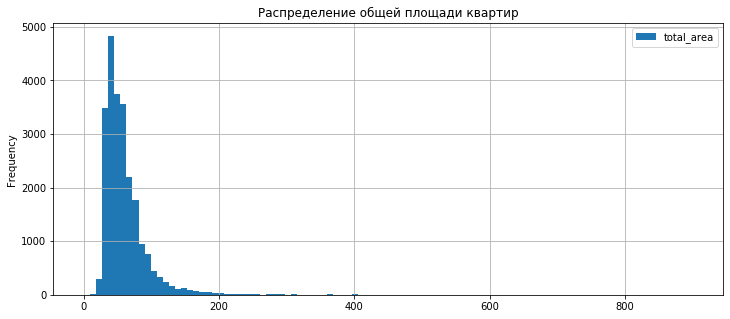

In [760]:
# изучаем распределение общей площади 
build_hist(df_log, 'total_area', 'Распределение общей площади квартир')

Распределение *общей площади* похоже на распределение Пуассона, следовательно, с данными всё хорошо. Площадь квартиры варьируется от 12 до 900 кв.м. В основном метраж колеблется от 12 до 900 кв.м. 75% процентов пользователей имеют квартиру площадью меньше 69 кв.м. Средняя площадь квартиры составляет 60.1 кв.м.

Квартиры общей площадью больше 200 кв.м встречаются редко, после 400 кв.м гистограмма сливается с нулём (это не значит, что там ровно ноль, но квартир с такой общей площадью единицы). Примем верхнюю границу распределения в 300 кв.м - среднее значением между 200 и 400 кв.м.

(count    23463.000000
 mean        59.166517
 std         30.407883
 min         12.000000
 25%         40.000000
 50%         52.000000
 75%         69.000000
 max        297.000000
 Name: total_area, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7d45443210>)

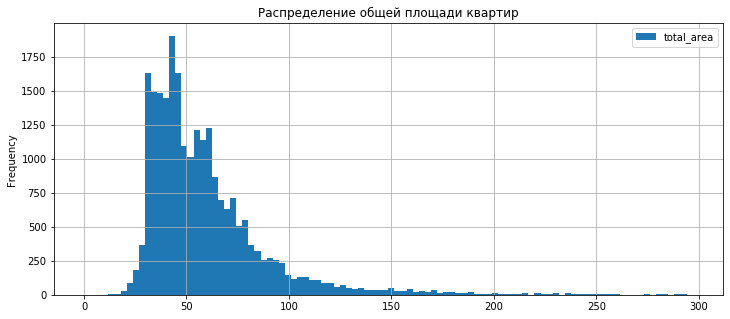

In [761]:
# удаление выбросов
df_log = df_log.query('total_area < 300')
# построение гистограммы 
build_hist(df_log, 'total_area', 'Распределение общей площади квартир')

(count    2.346300e+04
 mean     6.293044e+06
 std      7.725049e+06
 min      1.219000e+04
 25%      3.400000e+06
 50%      4.600000e+06
 75%      6.750000e+06
 max      3.300000e+08
 Name: last_price, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7d44f8cb90>)

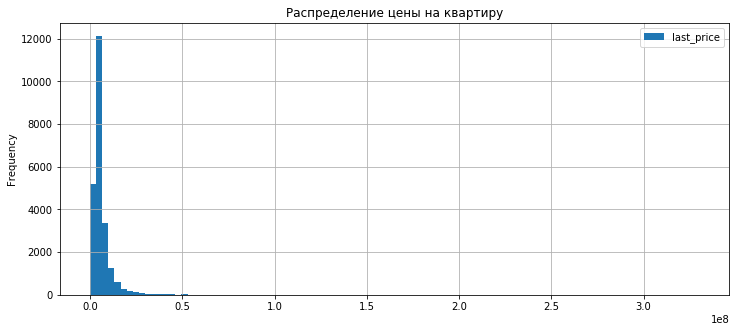

In [762]:
# изучаем распределение цены
build_hist(df_log, 'last_price', 'Распределение цены на квартиру')

Распределение *цены* также похоже на распределение Пуассона, поэтому в данных не должно быть ошибки. Однако диаграмма не настолько гладкая, как диаграмма распределения общей площади, т.е. распределение цены менее однородное. Цена квартиры на рынке недвижимости изменяется от 12190 тыс.руб до 330 млн.руб. На столь значительный разброс цен, вероятнее всего, повлияло время, зависимость стоимости квартиры от района, количества комнат в квартире и ряда других параметров, формирующих рыночную цену. 75% процентов пользователей приобрели квартиру меньше, чем за 6.75 млн.руб. Средняя стоимость квартиры составляет 6.3 млн.руб.

*Хвост* распределения длинный, поэтому в нём могут содержаться аномальные значения за пределами диапазона *нормальных* значений. Для оценки диапазона нам нужно воспользоваться методом boxplot() для построения графика.

In [763]:
# функция для автоматизированного построения графика, изображающего одномерное распределение вероятностей
def build_boxplot(column, y_max, title):
    ax = sns.boxplot(data=df_log[column])
    ax.set_title(title)
    ax.set_ylim(0, y_max)
    return ax

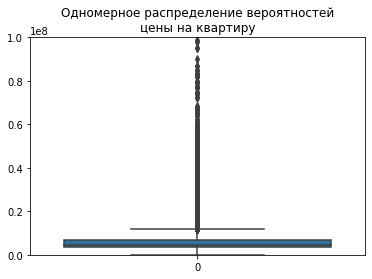

In [764]:
# построение графика, изображающего одномерное распределение вероятностей цены на квартиру
build_boxplot('last_price', 100000000, f'Одномерное распределение вероятностей\nцены на квартиру')

На графике в синем *ящике* показана черной линией медиана. Значение соответствует 4.646000e+06, полученному методом describe(). Две другие черные линии ограничивают интервал, в пределах которого располагаются нормальные значения. Все, что находится вне интервала считают *выбросами*. Однако мы не будем отсекать все значения, которые по графику входят в зону выбросов, т.к. таких значений очень много. График помогает сориентироваться в данных и показывает, в какой стороне могут находиться аномальные значения.

Рассчитаем межквартильный размах (Q3 - Q1 = 6.790000e+06 - 3.400000e+06) и прибавим к верхней границе *ящика*, чтобы получить значение, отсекающее выбросы.

In [765]:
# функция для автоматизированного расчёта верхней границы нормальных величин
def quantile_fence_high(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1 
    fence_high = q3 + 1.5 * iqr
    return fence_high

In [766]:
# расчёт границы нормальных величин
quantile_fence_high(df_log, 'last_price')

11775000.0

Верхняя граница диапазона находится около 2.0e7, после 2.0e7 и до 3.0e7 количество квартир уменьшается. Начиная с 3.0e7 гистограмма почти сливается с осью абсцис. Эти значения и отбросим.

(count    2.319300e+04
 mean     5.721463e+06
 std      3.989828e+06
 min      1.219000e+04
 25%      3.400000e+06
 50%      4.600000e+06
 75%      6.630000e+06
 max      2.999900e+07
 Name: last_price, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7d40bcd910>)

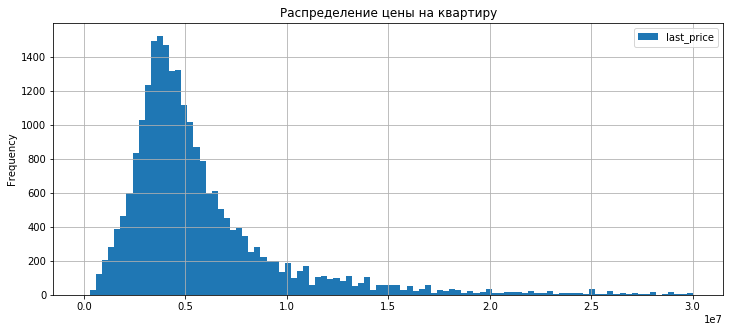

In [767]:
# удаление выбросов
df_log = df_log.query('last_price <  30000000')
# построение гистограммы 
build_hist(df_log, 'last_price', 'Распределение цены на квартиру')

(count    23193.000000
 mean         2.045747
 std          1.007870
 min          1.000000
 25%          1.000000
 50%          2.000000
 75%          3.000000
 max         16.000000
 Name: rooms, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7d40dcf710>)

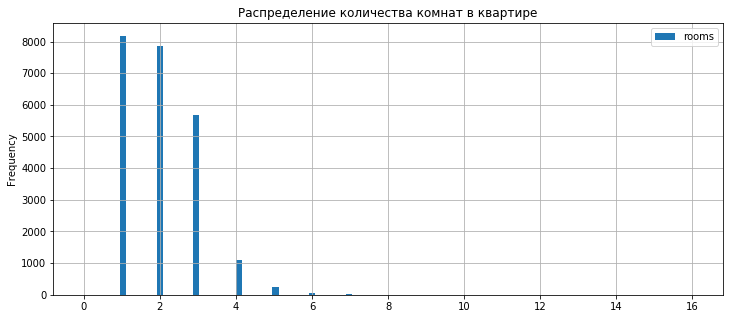

In [768]:
# изучаем распределение количества комнат
build_hist(df_log, 'rooms', 'Распределение количества комнат в квартире')

Распределение *количества комнат* похоже на распределение Пуассона, единственное  — на диаграмме много пропусков между значениями. Это объяснимо, ведь число комнат не может быть не целым. Количество комнат варьируется от 1 до 16. 75% процентов пользователей продают квартиру меньше, чем с тремя комнатами. Среднее количество комнат в квартире равно 2.

In [ ]:
# изучаем распределение высоты потолков
build_hist(df_log, 'ceiling_height', 'Распределение высоты потолков в квартире')

(count    23193.000000
 mean         2.111456
 std          0.323086
 min          1.000000
 25%          2.000000
 50%          2.000000
 75%          2.000000
 max          4.000000
 Name: ceiling_height, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7d4447d450>)

Распределение *высоты потолков* представлено двумя дискретными множествами величин: около двух и около трёх метров. В сводке числовых значений данных видим минимальное значение высоты потолка, равное одному метру. Такое значение является аномальным, т.к. бóльшая часть взрослых людей выше одного метра. К тому же по СНиП 31-01-2003 "Здания жилые многоквартирные" высота потолка в жилых помещениях и кухнях должна быть не менее 2.5 м, а в коридорах и холлах  — не менее 2.1 м.  Средняя высота потолка  — 2.11 м.

При приведение типов данных мы округляли значения. Поэтому примем нижнюю границу распределния равную 2 м.

In [ ]:
# удаление выбросов
df_log = df_log.query('ceiling_height >= 2')
# построение гистограммы 
build_hist(df_log, 'ceiling_height', 'Распределение высоты потолков в квартире')

Теперь изучим параметр *времени продажи* квартиры. Будем считать, что квартира продана тогда, когда пользователь снял объявление о продаже квартиры с сайта. Поэтому будем ориентироваться на столбец `days_exposition`. Построим диаграмму распределения.

In [ ]:
# изучаем распределение времени продажи квартиры
build_hist(df_log, 'days_exposition', 'Распределение времени продажи квартиры')

Вид графика распределения времени продажи квартиры корректный. Среднее время продажи квартиры составляет 179 дней, а медианное значение  — 95 дней. На среднее значение могли повлиять аномально большие сроки продажи некоторых квартир.

Чтобы определить, какие значения выбиваются из выборки, необходимо оценить диапазон *нормальных* значений. В этом нам поможет метод *boxplot()* для построения графика.

In [ ]:
# построение графика, изображающего одномерное распределение вероятностей
build_boxplot('days_exposition', 1600, f'Одномерное распределение вероятностей\nвремени продажи квартиры')

На графике в синем *ящике* показана черной линией медиана. Значение соответствует 95. Две другие черные линии ограничивают интервал, в пределах которого располагаются нормальные значения.

Рассчитаем межквартильный размах (Q3 - Q1 = 231 - 45) и прибавим к верхней границе *ящика*, чтобы получить значение, отсекающее выбросы. Не будем отсекать ровно по полученному значению, выберем оптимальное.

In [ ]:
# расчёт границы нормальных величин
quantile_fence_high(df_log, 'days_exposition')

Примем верхнюю границу в 1000 дней. Это значение кажется разумным, т.к. после него график начинает постепенно сливаться с осью. Т.е. больше, чем за 1000 дней квартиру продают единицы пользователей.

In [ ]:
# удаление выбросов
df_log = df_log.query('days_exposition < 1000')
# построение гистограммы 
build_hist(df_log, 'days_exposition', 'Распределение времени продажи квартиры')

**Задача исследования** — найти параметры, с которыми связана рыночная цена квартиры. Для этой задачи нам понадобятся графики зависимости цены от параметров. Первыми исследуем *площадь, число комнат и удалённость от центра*. Построим диаграммы рассеяния для четырёх параметров.

Занесём колонки `total_area`, `rooms`, `last_price` в отдельный датафрейм и построим диаграмму, используя метод *scatter_matrix()*. `cityCenters_nearest` исследуем отдельно, т.к. нужно разобраться со значениями NaN перед построением.

In [ ]:
# построение диаграмм рассеяния
df_log_1 = df_log[['total_area', 'rooms', 'last_price']]
pd.plotting.scatter_matrix(df_log_1, figsize=(12, 12))
plt.suptitle(f'Диаграммы рассеяния параметров, влияющих на стоимость квартиры:\nобщая площадь, количество комнат, цена')
plt.show()

На диаграммах видим следующие зависимости:
* чем выше общая площадь, тем выше цена
* чем больше количество комнат, тем выше цена (хорошо прослеживается от 1 до 4 комнат)

Посмотрим на коэффициенты корреляции величин:

In [ ]:
# вывод коэффициентов корреляции
print(df_log_1.corr())

Коэффициенты корреляции подтверждают графики. Корреляция положительная и достаточно сильная. **Т.е. цена зависит от общей площади квартиры и количества комнат**.

In [ ]:
# удаление NaN переменных
df_log_2 = df_log[['cityCenters_nearest', 'last_price']]
df_log_2 = df_log_2.dropna()
# построение диаграммы рассеяния
df_log_2.plot(x='cityCenters_nearest', y='last_price', kind='scatter')
plt.suptitle('Диаграмма рассеяния для цены и расстояния от центра')
plt.show()

Из графика видно, что увеличени расстояния до центра приводит к снижению цены на квартиру. Посмотрим коэффициенты корреляции, чтобы оценить связь.

In [ ]:
# вывод коэффициентов корреляции
print(df_log_2.corr())

Коэффициенты корреляции подтверждают графики. Корреляция отрицательная, но более слабая, чем у параметров общей площади и числа комнат. **Цена зависит от расстояния квартиры до центра, однако связь менее сильная, чем у предыдущих параметров**.

Теперь посмотрим на зависимость цены от дня недели, месяца и года публикации объявления.

In [ ]:
# построение диаграмм рассеяния
df_log_3 = df_log[['last_price', 'month', 'weekday', 'year']]
pd.plotting.scatter_matrix(df_log_3, figsize=(9, 9))
plt.suptitle('Диаграммы рассеяния для цены, месяца, дня недели и года')
plt.show()

Цены на квартиры меняются в зависимости от времени размещения (даты), но зависимость нелинейная. Самая низкая цена на квартиры была в январе в субботу в 2015 году.

Посмотрим на коэффициенты корреляции.

In [ ]:
# вывод коэффициентов корреляции
print(df_log_3.corr())

**Корреляция дня недели, года и месяца публикации объявления с ценой квартиры достаточно слабая, если ориентироваться на коэффициенты. Корреляция может быть неочевидной, т.к. прямой математической зависимости здесь нет, поскольку есть и другие факторы, влияющие на цену вне рассматриваемых.**

Далее посмотрим на этаж, на котором располагается квартира. Зависит ли цена на квартиру от этажа?

In [ ]:
# построение диаграммы
df_log_4 = df_log[['floor_category_id', 'last_price']]
df_log_4.plot(x='floor_category_id', y='last_price', kind='scatter')
plt.suptitle('Диаграмма рассеяния для цены и категории этажа')
plt.show()

*Обозначение этажей:*
    
* 0  — первый 
* 1  — другой
* 2  — последний 

**На первом и последнем этажах цены выше, чем на *других* этажах, т.е. промежуточных.**

Проанализируем зависимость цены квартиры от месторасположения в конкретном населённом пункте. Отберём 10 населённых пунктов с наибольшим количество объявлений.

In [ ]:
# группировка и фильтрация таблицы
df_10_places = df.groupby('locality_name')['rooms'].count().sort_values(ascending=False).head(10)
print(df_10_places)

Посчитаем среднюю цену квадратного метра в отобранных населённых пунктах.

In [ ]:
# подсчёт средних значений квадратного метра
places_10 = ['санкт-петербург', 'посёлок мурино', 'посёлок шушары',
             'всеволожск', 'пушкин', 'колпино', 'посёлок парголово',
             'гатчина', 'деревня кудрово', 'выборг']
square_meter_price = []
for place in places_10:
    df_log = df[df['locality_name'] == place]
    square_meter_price.append(df_log['square_meter_price'].mean())

# создание датафрейма
df_square_meter_price = pd.DataFrame()
df_square_meter_price['locality_name'] = places_10
df_square_meter_price['square_meter_price'] = square_meter_price

# вывод таблицы
print(df_square_meter_price)

Самая высокая стоимость жилья среди выборки отмечена в Санкт-Петербурге, а самая низкая стоимость жилья — в Выборге.

Мы изучили зависимости цены и параметров для всех квартир в целом. Попробуем теперь выделить сегмент квартир, расположенных в центре города и посмотреть: есть ли разница в зависимостях параметров и цены. Возьмём город Санкт-Петербург и определим сегмент квартир, входящих в центральную зону.

Для этого построим гистограмму цены квадратного метра `square_meter_price` в зависимости от удалённости от центра в километрах. Создадим столбец `cityCenters_nearest_km`.

In [ ]:
# создание столбца в единицах измерения "километры"
df['cityCenters_nearest_km'] = df['cityCenters_nearest'] / 1000
# группировка данных
df_center = df.query('locality_name == "санкт-петербург"').dropna(subset=['cityCenters_nearest_km'])
df_center_grouped = df_center.groupby('cityCenters_nearest_km')['square_meter_price'].mean()
print(df_center_grouped)

Всего километров 29, поэтому поставим ограничение по оси *x* в 30 км.

In [ ]:
# построение гистограммы
df_center_grouped.plot(xlim=(0, 30))

In [ ]:
# построение гистограммы к округлением значений расстояния до центра
df_center_grouped.index = df_center_grouped.index.astype('int')
df_center_grouped.plot(style='o-', xlim=(0, 30))
print(df_center_grouped)

Цена растёт по мере приближения к центру. Резкое подорожание одного квадратного метра квартиры начинается от 10ого километра от центра. Значит, центральная зона, предположительно, ограничивается радиусом в 10 километров от центра. 

Для центральной зоны также проанализируем площадь, цену, число комнат и высоту потолков. Построим графики параметров.

In [ ]:
# создаём новый датафрейм для центральной зоны Санкт-Петербурга
df_center_city = df.query('locality_name == "санкт-петербург" and cityCenters_nearest_km <= 10')

# изучаем распределение общей площади 
build_hist(df_center_city, 'total_area', 'Распределение общей площади квартир в центре')

In [ ]:
# изучаем распределение цены
build_hist(df_center_city, 'last_price', 'Распределение цены на квартиру в центре')

In [ ]:
# изучаем распределение количества комнат
build_hist(df_center_city, 'rooms', 'Распределение количества комнат в квартире в центре')

In [ ]:
# изучаем распределение высоты потолков
build_hist(df_center_city, 'ceiling_height', 'Распределение высоты потолков в квартире в центре')

In [ ]:
#изучаем распределение времени продажи квартиры
build_hist(df_center_city, 'days_exposition', 'Распределение времени продажи квартиры в центре')

Внешний вид распределений параметров не изменился. Медианные значения распределения числа комнат `rooms` и высоты потолков `ceiling height` остались неизменными. Выросли медианы распределений цены квартиры *(8.2+e06 против 4.6+е06)*, *общей площади (71 кв.м против 52 кв.м)* и увеличился срок продажи квартиры: *медиана возросла с 95 дней до 120 дней*. Средние значения изменились в соответствии с медианными.

Посмотрим на диаграммы рассеяния `rooms`, `total_area`, `cityCenters_nearest`, `month`, `weekday`, `year`, `floor_category_id`, как и для выборки, включающей все квартиры, чтобы посмотреть на характер зависимостей этих параметров от цены.

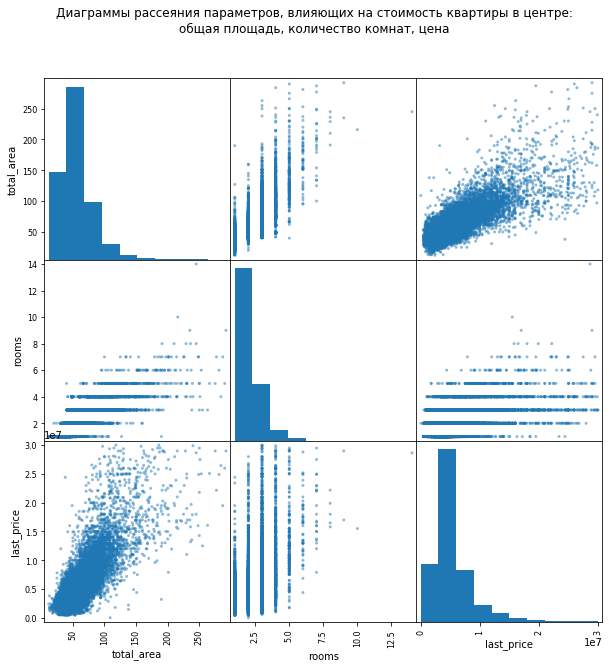

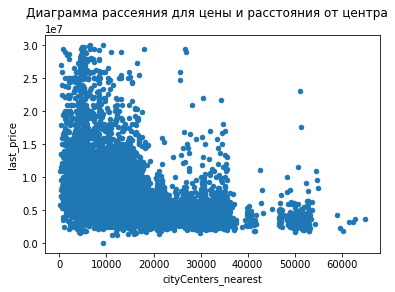

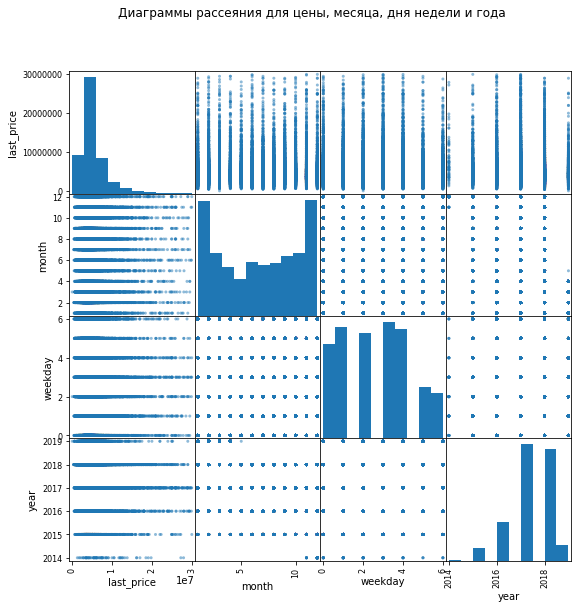

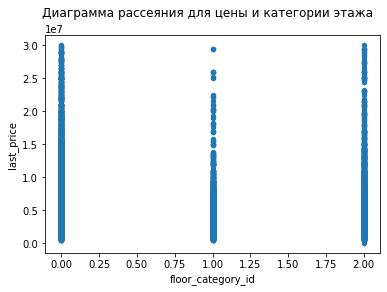

In [702]:
# построение диаграмм рассеяния
df_log_5 = df_log[['total_area', 'rooms', 'last_price']]
pd.plotting.scatter_matrix(df_log_5, figsize=(10, 10))
plt.suptitle(f'Диаграммы рассеяния параметров, влияющих на стоимость квартиры в центре:\nобщая площадь, количество комнат, цена')

df_log_6 = df_log[['cityCenters_nearest', 'last_price']]
df_log_6 = df_log_2.dropna()
df_log_6.plot(x='cityCenters_nearest', y='last_price', kind='scatter')
plt.suptitle('Диаграмма рассеяния для цены и расстояния от центра')

df_log_7 = df_log[['last_price', 'month', 'weekday', 'year']]
pd.plotting.scatter_matrix(df_log_7, figsize=(9, 9))
plt.suptitle('Диаграммы рассеяния для цены, месяца, дня недели и года')

df_log_8 = df_log[['floor_category_id', 'last_price']]
df_log_8.plot(x='floor_category_id', y='last_price', kind='scatter')
plt.suptitle('Диаграмма рассеяния для цены и категории этажа')
plt.show()

Характер зависимостей для центральной зоны сохранился. Поэтому можем ориентироваться для укрупнённую выборку.

**Вывод**

В результате исследовательского анализа данных обнаружены параметры, влияющие на формирование рыночной цены на квартиру.

## Общий вывод

Выявлены параметры, формирующие рыночную стоимость недвижимого имущества. Такими параметрами являются:
* общая площадь *(положительная корреляция)*
* количество комнат *(положительная корреляция)*
* расстояние до центра города *(отрицательная корреляция)*
* этаж *(на последнем и первом этажах цены выше)*
* дата размещения объявления *(зависимость от месяца, дня недели и года; нелинейная зависимость)*

Медианные значения параметров могут меняться от центрального района города к окраинам, однако характер зависимостей остаётся неизменным.